<a href="https://colab.research.google.com/github/prithwis/AGI/blob/main/SnakeFrog_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

In [ ]:
# 1. Update package list and install the NEW opengl names
!apt-get update > /dev/null 2>&1
!apt-get install -y xvfb ffmpeg freeglut3-dev python3-opengl libgl1-mesa-dev libglu1-mesa-dev mesa-utils > /dev/null 2>&1

# 2. Install the system dependencies (SWIG is the key here)
#!apt-get update
!apt-get install -y swig build-essential python3-dev > /dev/null 2>&1

# 3. Upgrade pip and setuptools to handle the build process better
!pip install --upgrade pip setuptools wheel > /dev/null 2>&1

# 4. Now install gymnasium with box2d support
!pip install "gymnasium[box2d]" > /dev/null 2>&1

# 5. Install the Python libraries
!pip install pyvirtualdisplay  pygame opencv-python > /dev/null 2>&1


In [ ]:
import gymnasium as gym
try:
    env = gym.make("LunarLander-v3")
    print("Success! The physics engine is ready for AGI training.")
    env.close()
except Exception as e:
    print(f"Error: {e}")

/usr/local/lib/python3.12/dist-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


Success! The physics engine is ready for AGI training.


In [ ]:
import pygame
import cv2
import numpy as np
import os

from IPython.display import Video, display

import pygame
import numpy as np
import cv2
import os
from IPython.display import Video, display

In [ ]:
# --- CONFIG ---
WIDTH, HEIGHT = 640, 480  # Standard VGA resolution is more stable
video_filename = 'simulation.avi' # Use .avi for better internal compatibility

def create_simulation_video():
    if os.path.exists(video_filename): os.remove(video_filename)

    pygame.init()
    screen = pygame.Surface((WIDTH, HEIGHT))

    # CODEC: 'XVID' is the most robust for silent failures
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    video = cv2.VideoWriter(video_filename, fourcc, 30.0, (WIDTH, HEIGHT))

    # Check if writer opened correctly
    if not video.isOpened():
        print("Error: VideoWriter failed to open. Check your permissions.")
        return

    # --- SIMULATION ---
    for t in range(150): # 5 seconds at 30fps
        screen.fill((30, 30, 30))

        # Draw a simple moving target (The Frog)
        x = int(320 + 100 * np.cos(t * 0.1))
        y = int(240 + 100 * np.sin(t * 0.1))
        pygame.draw.circle(screen, (0, 255, 0), (x, y), 20)

        # 1. Capture and RESIZE (Force exact dimensions)
        view = pygame.surfarray.array3d(screen)
        view = view.transpose([1, 0, 2])
        view = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
        view = cv2.resize(view, (WIDTH, HEIGHT)) # <--- THE GUARD

        # 2. Write frame
        video.write(view)

    # 3. CRITICAL: Release the file so Colab can see it
    video.release()
    pygame.quit()
    print(f"Success! {video_filename} is saved. Size: {os.path.getsize(video_filename)} bytes")



In [ ]:
create_simulation_video()

Success! simulation.avi is saved. Size: 111382 bytes


In [ ]:
# Convert .avi to .mp4 for the browser
!ffmpeg -y -i simulation.avi -c:v libx264 -crf 19 -preset slow -pix_fmt yuv420p output.mp4 -hide_banner -loglevel error

display(Video('output.mp4', embed=True, width=640))

In [ ]:
# --- 1. SETUP ---
WIDTH, HEIGHT = 640, 480
FPS = 30
SECONDS = 10  # Longer simulation to see the spiral grow
raw_video = 'temp_sim.avi'
final_video = 'spiral_chase.mp4'

def create_spiral_chase():
    if os.path.exists(raw_video): os.remove(raw_video)

    pygame.init()
    screen = pygame.Surface((WIDTH, HEIGHT))

    # We use XVID for the initial stable write
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    video = cv2.VideoWriter(raw_video, fourcc, FPS, (WIDTH, HEIGHT))

    # Positions
    frog_pos = np.array([300.0, 200.0])
    snakes = [np.array([float(np.random.randint(0, WIDTH)),
                        float(np.random.randint(0, HEIGHT))]) for _ in range(4)]

    print("Simulating Spiral Chase... capturing frames.")

    for t in range(FPS * SECONDS):
        # A. SPIRAL LOGIC (The Frog)
        # Radius increases over time (t * 0.5), creating a spiral
        radius = t * 0.8
        angle = t * 0.15
        frog_pos[0] = 320 + radius * np.cos(angle)
        frog_pos[1] = 240 + radius * np.sin(angle)

        # B. CHASE LOGIC (The Snakes)
        for s_pos in snakes:
            direction = frog_pos - s_pos
            dist = np.linalg.norm(direction)
            if dist > 0:
                # Snakes get slightly faster as the game goes on
                speed = 3.0 + (t * 0.005)
                s_pos += (direction / dist) * speed

        # C. DRAWING
        screen.fill((25, 25, 35)) # Deep space blue
        # Frog (Target)
        pygame.draw.circle(screen, (0, 255, 100), (int(frog_pos[0]), int(frog_pos[1])), 14)
        # Snakes (Agents)
        for s_pos in snakes:
            pygame.draw.rect(screen, (255, 80, 80), (int(s_pos[0]-10), int(s_pos[1]-10), 20, 20))

        # D. CAPTURE & WRITE
        view = pygame.surfarray.array3d(screen)
        view = view.transpose([1, 0, 2])
        view = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
        video.write(view)

    video.release()
    pygame.quit()



In [ ]:
# --- 2. RUN AND CONVERT ---
create_spiral_chase()
print("\n--- CHASE COMPLETE ---")

Simulating Spiral Chase... capturing frames.


In [ ]:
# Convert to H.264 MP4 so the browser can play it
!ffmpeg -y -i {raw_video} -c:v libx264 -pix_fmt yuv420p {final_video} -hide_banner -loglevel error


display(Video(final_video, embed=True, width=600))

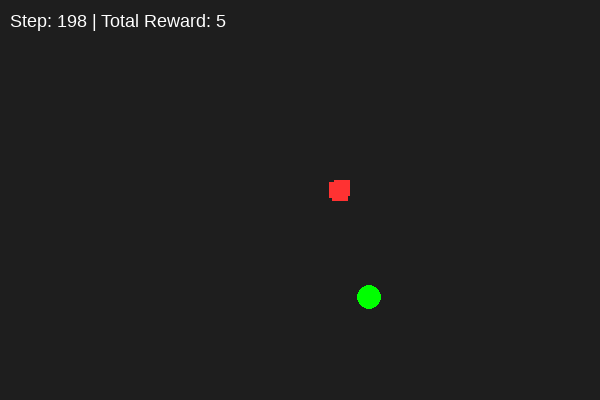

Simulation ended. Final Agent Score: 5


In [ ]:
import pygame
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import time

# --- 1. CONFIGURATION ---
WIDTH, HEIGHT = 600, 400
FROG_COLOR = (0, 255, 0)
SNAKE_COLOR = (255, 50, 50)
TEXT_COLOR = (255, 255, 255)

def run_live_simulation(steps=200):
    pygame.init()
    # Virtual display surface
    screen = pygame.Surface((WIDTH, HEIGHT))
    font = pygame.font.SysFont('Arial', 18)

    # Starting Positions
    frog_pos = np.array([300.0, 200.0])
    snakes = [np.array([float(np.random.randint(0, WIDTH)),
                        float(np.random.randint(0, HEIGHT))]) for _ in range(3)]

    total_reward = 0

    for t in range(steps):
        # A. MOVE THE FROG (The target)
        # It moves in a circle so you can see the snakes react to change
        angle = t * 0.1
        frog_pos[0] = 300 + 120 * np.cos(angle)
        frog_pos[1] = 200 + 120 * np.sin(angle)

        # B. SNAKE MOVEMENT & REWARD CALCULATION
        step_reward = 0
        for s_pos in snakes:
            direction = frog_pos - s_pos
            distance = np.linalg.norm(direction)

            # Simple "Agent Logic"
            if distance > 5:
                s_pos += (direction / distance) * 4.0 # Speed

            # REWARD: If snake is close to frog, add points
            if distance < 30:
                step_reward += 1

        total_reward += step_reward

        # C. DRAWING THE SCENE
        screen.fill((30, 30, 30))
        # Draw Frog
        pygame.draw.circle(screen, FROG_COLOR, (int(frog_pos[0]), int(frog_pos[1])), 12)
        # Draw Snakes
        for s_pos in snakes:
            pygame.draw.rect(screen, SNAKE_COLOR, (int(s_pos[0]-8), int(s_pos[1]-8), 16, 16))

        # D. OVERLAY THE "INTERMEDIATE STEPS" (Status Bar)
        reward_text = font.render(f"Step: {t} | Total Reward: {total_reward}", True, TEXT_COLOR)
        screen.blit(reward_text, (10, 10))

        # E. SHOW IN COLAB (Every 2nd frame to reduce flicker)
        if t % 2 == 0:
            view = pygame.surfarray.array3d(screen)
            view = view.transpose([1, 0, 2])
            view = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

            clear_output(wait=True)
            cv2_imshow(view)
            time.sleep(0.01) # Controls the "playback speed"

    pygame.quit()
    print(f"Simulation ended. Final Agent Score: {total_reward}")

run_live_simulation()

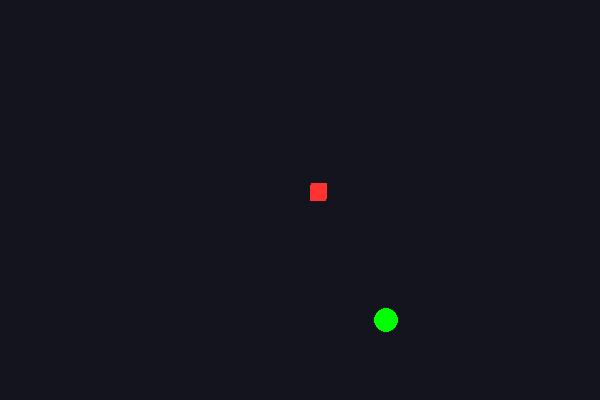

Step 99: Watching the snakes adjust their trajectory...


In [ ]:
import pygame
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import time

# --- CONFIG ---
WIDTH, HEIGHT = 600, 400
FPS_DELAY = 0.1 # Change this to 0.2 for very slow, or 0.05 for faster

def run_slow_live_simulation(steps=100):
    pygame.init()
    screen = pygame.Surface((WIDTH, HEIGHT))

    # Initialize positions
    frog_pos = np.array([300.0, 200.0])
    snakes = [np.array([float(np.random.randint(0, WIDTH)),
                        float(np.random.randint(0, HEIGHT))]) for _ in range(2)]

    for t in range(steps):
        # 1. LOGIC: Spiral Movement
        radius = t * 1.5
        angle = t * 0.2
        frog_pos[0] = 300 + radius * np.cos(angle)
        frog_pos[1] = 200 + radius * np.sin(angle)

        for s_pos in snakes:
            direction = frog_pos - s_pos
            dist = np.linalg.norm(direction)
            if dist > 0:
                s_pos += (direction / dist) * 5.0 # Movement speed

        # 2. RENDER
        screen.fill((20, 20, 30))
        pygame.draw.circle(screen, (0, 255, 0), (int(frog_pos[0]), int(frog_pos[1])), 12)
        for s_pos in snakes:
            pygame.draw.rect(screen, (255, 50, 50), (int(s_pos[0]-8), int(s_pos[1]-8), 16, 16))

        # 3. DISPLAY & DELAY
        # Convert for Colab display
        view = pygame.surfarray.array3d(screen)
        view = view.transpose([1, 0, 2])
        view = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

        clear_output(wait=True)
        cv2_imshow(view)

        # --- THE SLOW DOWN ---
        print(f"Step {t}: Watching the snakes adjust their trajectory...")
        time.sleep(FPS_DELAY) # This is your "speed knob"

    pygame.quit()

run_slow_live_simulation()

#Chronobooks <br>
Three science fiction novels by Prithwis Mukerjee. A dystopian Earth. A technocratic society managed by artificial intelligence. Escape and epiphany on Mars. Can man and machine, carbon and silicon explore and escape into other dimensions of existence? An Indic perspective rooted in Advaita Vedanta and the Divine Feminine.  [More information](http://bit.ly/chrono3) <br>
![alt text](https://blogger.googleusercontent.com/img/a/AVvXsEjsZufX_KYaLwAnJP6bUxvDg5RSPn6r8HIZe749nLWX3RuwyshrYEAUpdw03a9WIWRdnzA9epwJOE05eDJ0Ad7kGyfWiUrC2vNuOskb2jA-e8aOZSx8YqzT8mfZi3E4X1Rz3qlEAiv-aTxlCM976BEeTjx4J64ctY3C_FoV4v9aY_U23F8xRqI5Eg=s1600)